<a href="https://colab.research.google.com/github/sidharth-ds/Image-Audio-basics/blob/main/Image_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* for beginner, learn only with medical images.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from PIL import Image

In [ ]:
# from google.colab import files
# files.upload()

## Reading the image:

In [ ]:
painting  = plt.imread("medical image .jpg")

In [ ]:
painting.shape

(768, 1024, 3)

Shape of image:
* 768 -- rows (height)
* 1024 --- columns (width)
* 3 -- color (RGB)

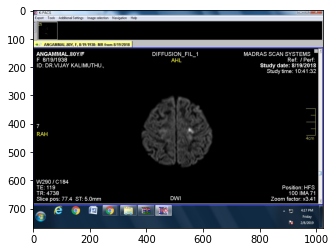

In [ ]:
plt.imshow(painting)

In [ ]:
painting.shape[0]*painting.shape[1]   # output --- no:of boxes in the image (rows * columns)

786432

* 2**8 = 256 means 8 bit color
* 256 possibilities of color

In [ ]:
img = Image.open("medical image .jpg")

## to convert all the data into grey scale image:

In [ ]:
img = Image.open("medical image .jpg").convert("L")
rawdata = img.load()

In [ ]:
import pandas as pd

In [ ]:
# x = pd.DataFrame(data=rawdata)  # converting rawdata into dataframe
# x

In [ ]:
rawdata[20,30]      # [width,height]

1

In [ ]:
rawdata[200,600]  # 200 (x-axis), 600 (y-axis)

0

Output:
* 0 means : black
* 255 means : pure white
* 0 to 255 means: transition from dark to light

### To detect the blood clot in the image:

In [ ]:
data_new=[]
w = 540

while(w<570):
    h = 420
    data=[]
    while(h<460):
        data.append(rawdata[w,h])
        h=h+1
    data_new.append(data)
    w=w+1

In [ ]:
len(data_new)  # total_no:of_items in the list

30

In [ ]:
len(data_new[1])  # total_no:of_items in the list of (1st item of the outer list)

40

In [ ]:
df = pd.DataFrame(data_new)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,69,71,72,73,74,72,69,66,64,63,61,61,62,63,65,66,66,64,63,62,61,58,58,58,57,56,55,53,50,49,47,45,44,43,42,42,42,43,45,48
1,70,73,75,76,76,75,73,70,68,66,64,63,64,65,66,67,68,67,66,66,65,63,63,64,64,63,62,60,57,54,49,45,43,40,37,35,35,35,37,41
2,69,72,75,77,77,77,76,76,75,73,71,70,70,70,70,70,69,68,67,67,65,64,65,67,68,69,68,66,63,59,53,49,46,43,39,36,37,35,35,39
3,68,70,73,76,77,78,79,80,81,80,79,78,77,77,75,72,70,67,66,65,63,62,64,68,70,71,71,69,69,65,60,56,53,50,46,44,42,39,37,39
4,65,68,71,72,76,79,83,86,88,89,88,89,87,84,80,76,73,68,65,64,61,59,61,68,72,73,73,75,74,70,67,64,60,57,55,52,47,44,41,42
5,65,68,70,72,75,79,84,89,94,96,98,99,91,87,82,78,73,68,64,62,60,58,61,67,73,74,75,77,79,75,73,70,66,63,61,58,56,51,47,45
6,84,87,89,90,93,94,96,98,98,98,97,96,92,88,83,78,74,68,65,63,61,60,62,68,73,76,77,79,81,78,76,73,70,68,66,63,60,56,52,49
7,102,107,109,109,112,110,109,106,103,99,96,93,88,84,80,77,74,70,67,66,64,64,65,70,75,77,78,80,80,78,77,75,73,71,70,67,64,61,57,55
8,120,126,127,127,128,122,117,112,107,102,97,92,85,82,78,75,73,71,70,70,67,67,69,73,76,78,79,80,82,80,79,79,77,76,75,72,71,68,64,61
9,145,151,151,150,150,140,129,120,110,102,94,85,83,79,76,75,73,72,72,72,71,72,73,76,79,81,82,83,84,82,82,81,80,78,76,74,72,69,66,64


Spotting the blood clot:
* the maximum number is 224 (towards white color)

slice position (x_ray angle position):
* 120 degree
* each degree has 10 divisions
* total 1200 divisions

* we can generate 3d shape with this data.
* https://plotly.com/python/visualizing-mri-volume-slices/

In [ ]:
img = Image.open("medical image .jpg").convert("P")  # another type of greyscale conversion
rawdata = img.load()

In [ ]:
rawdata[20,50]

0

## Editing the image:

In [ ]:
img = Image.open("medical image .jpg")   # without conversion (output in : R,G,B)
rawdata = img.load()

In [ ]:
rawdata[20,50]

(7, 5, 0)

In [ ]:
w,h = img.size  # getting width & height of the image
w,h

(1024, 768)

* editing with colors:

In [ ]:
for i in range(w//2):            # upto half x_axis from the top
  for j in range(h):                  # entire y_axis from the top
#    r,g,b = img.getpixel((i,j))
    rawdata[i,j] = (255,0,0)      # (r,g,b)

img.save("mypic",format="png")

* converting into Grey_scale image: formula

In [ ]:
for i in range(w//2):       
  for j in range(h):            
    r,g,b = img.getpixel((i,j))
    grey = 0.299*r + 0.587*g + 0.114*b
    rawdata[i,j] = (int(grey),int(grey),int(grey))

img.save("mypic_brain",format="png")

Assignment below cell:
* top right: cyan
* bottom left: grey scale
* other section: **normal**

In [ ]:
# bottom left: grey_scale
for i in range(w//2):       # upto middle of x-axis
  for j in range(h//2,h):            # from the middle to bottom of y-axis
    r,g,b = img.getpixel((i,j))
    grey = 0.299*r + 0.587*g + 0.114*b
    rawdata[i,j] = (int(grey),int(grey),int(grey))

# top right: cyan
for i in range(w//2,w):       # from the middle to right side of x-axis
  for j in range(h//2):            # top to middle in y-axis
    rawdata[i,j] = (0,255,255)


img.save("mypic_brain-3-2",format="png")

## Creating New_Image:

In [ ]:
input_img = Image.new(mode="RGB",size=(400,400),color='blue')
input_img.save("new.png")